[*********************100%***********************]  1 of 1 completed


Mean Absolute Error: 2.0150775631173716
Mean Squared Error: 7.151820585421771


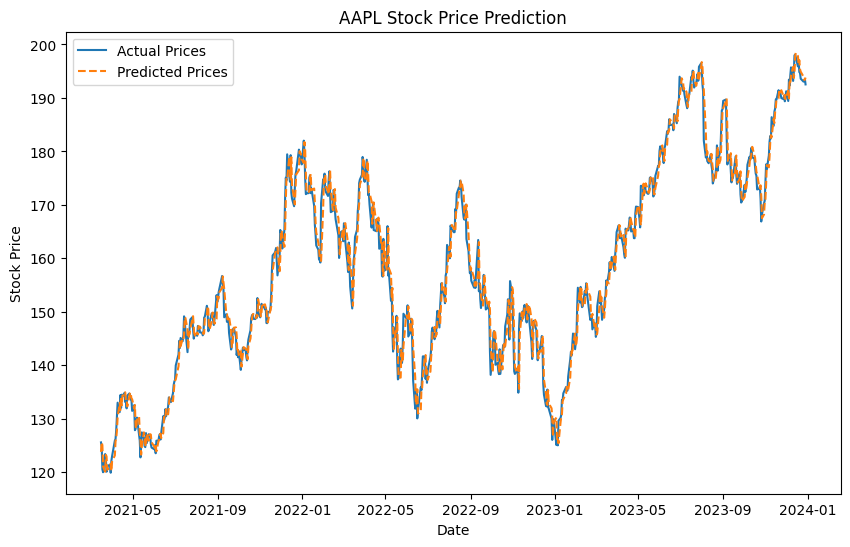

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Download stock data
stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2010-01-01', end='2024-01-01')

# Step 2: Data Preprocessing
data = data[['Close']]
for i in range(1, 6):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Step 3: Split the data into training and testing sets
X = data.drop(columns=['Close'])
y = data['Close']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions
predictions = model.predict(X_test)

# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')

# Step 7: Plot the predictions vs actual prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, predictions, label='Predicted Prices', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.legend()
plt.show()
